# Get feature importance / SHAP values

In [1]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as pl
import ml_help
from time import time
import seaborn as sns
sns.set_theme()

/home/uncle_opal/miniconda3/envs/rapids/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/uncle_opal/miniconda3/envs/rapids/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def d

In [2]:
df = pd.read_csv("./data/gardiner_flow_weather_incidents.csv.zip")
df

,currentSpeed,Mag. of Delay,Length,Delay,Dist. From Mid. Point,Visibility,Temperature,Feels Like,Humidity,Wind Speed,...,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,94.0,2.0,372.91800,199.0,-1.000000,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,94.0,0.0,302.76535,0.0,7.069406,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,94.0,0.0,302.76535,0.0,7.069406,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,94.0,0.0,273.82825,0.0,-1.000000,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,94.0,0.0,254.24487,0.0,7.111841,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94011,92.0,0.0,0.00000,0.0,-1.000000,10.0,9.77,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94012,92.0,0.0,0.00000,0.0,-1.000000,10.0,9.77,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94013,79.0,3.0,432.59130,136.0,7.111841,10.0,9.64,5.90,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94014,92.0,1.0,735.00830,148.0,-1.000000,10.0,9.61,5.86,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
X = df.drop("currentSpeed",axis=1)
y = df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=42)

# XGBoost

Fitting...
Fitting... OK! Took 26.159545421600342 seconds
Explaining...
Explaining... OK! Took 6.839772701263428 seconds
Calculating shap values...


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Calculating shap values... OK! Took 91.33679294586182 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


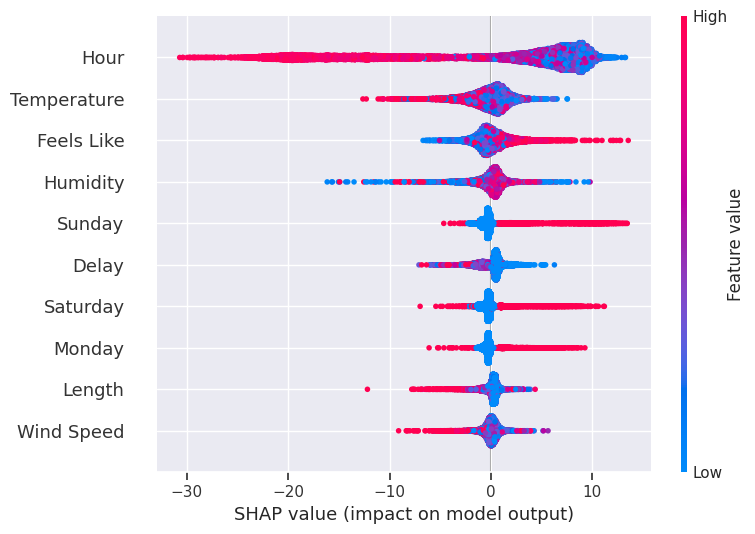

In [4]:
import xgboost as xgb

params = ml_help.params_to_dict("123_xgboost")
params["predictor"] = "cpu_predictor"
params["tree_method"] = "hist"

model = xgb.XGBRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
xgboost_fig = pl.gcf()
pl.savefig("./plots/126_xgboost.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/126_xgboost.png", bbox_inches="tight")
pl.savefig("./plots/126_xgboost.pdf", bbox_inches="tight")

# Random Forest

Fitting...
Fitting... OK! Took 20.097434759140015 seconds
Explaining...
Explaining... OK! Took 0.010329961776733398 seconds
Calculating shap values...
Calculating shap values... OK! Took 29.933910369873047 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


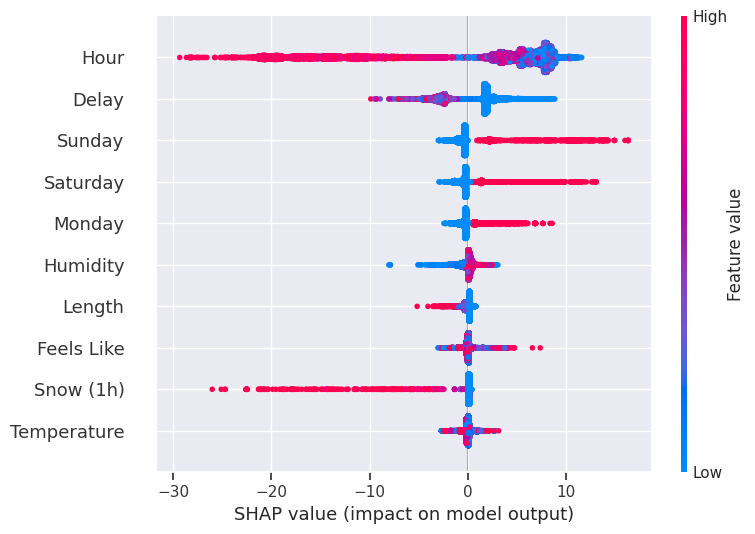

In [5]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("123_random_forest")
model = RandomForestRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/126_random_forest.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/126_random_forest.png", bbox_inches="tight")
pl.savefig("./plots/126_random_forest.pdf", bbox_inches="tight")

# Decision Tree

Fitting...
Fitting... OK! Took 0.2928433418273926 seconds
Explaining...
Explaining... OK! Took 0.0004744529724121094 seconds
Calculating shap values...
Calculating shap values... OK! Took 0.30664682388305664 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


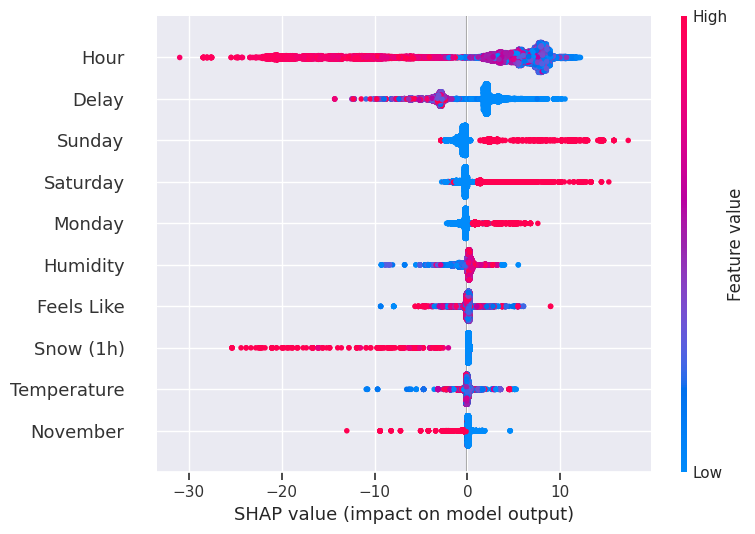

In [6]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("123_decision_tree")
model = DecisionTreeRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/126_decision_tree.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/126_decision_tree.png", bbox_inches="tight")
pl.savefig("./plots/126_decision_tree.pdf", bbox_inches="tight")

# MLP

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Fitting...


X does not have valid feature names, but MLPRegressor was fitted with feature names


Fitting... OK! Took 142.2542245388031 seconds
Explaining...
Explaining... OK! Took 0.0009267330169677734 seconds
Calculating shap values...


100%|███████████████████████████████████| 18804/18804 [1:33:32<00:00,  3.35it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Calculating shap values... OK! Took 5612.622662782669 seconds


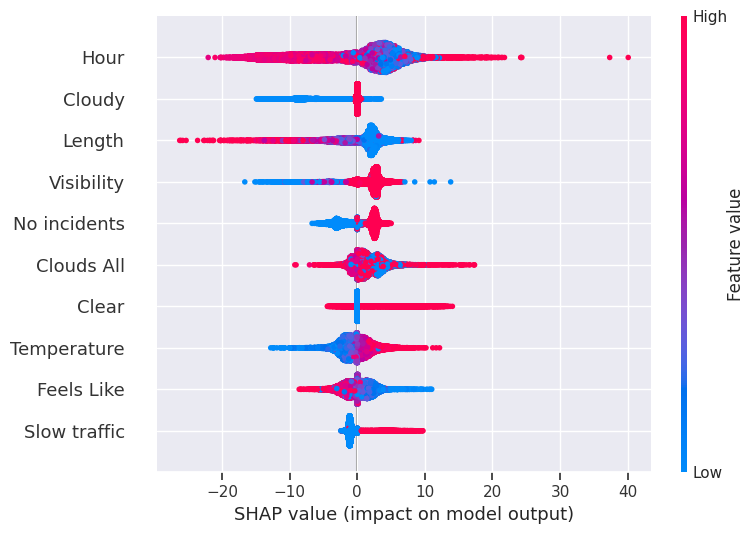

In [7]:
from sklearn.neural_network import MLPRegressor
import warnings

X_train_summary = shap.kmeans(X_train, 10)

params = ml_help.params_to_dict("123_mlpr")
model = MLPRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.KernelExplainer(model.predict, X_train_summary)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/126_mlp.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/126_mlp.png", bbox_inches="tight")
pl.savefig("./plots/126_mlp.pdf", bbox_inches="tight")